### Data Understanding


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('job_recommendation_dataset.csv')

df.head()

,Job Title,Company,Location,Experience Level,Salary,Industry,Required Skills
0,Early years teacher,Richardson Ltd,Sydney,Senior Level,87000.0,Healthcare,Pharmaceuticals
1,Counselling psychologist,"Ramos, Santiago and Stewart",San Francisco,Mid Level,50000.0,Marketing,"Google Ads, SEO, Content Writing"
2,Radio broadcast assistant,Franco Group,New York,Mid Level,77000.0,Healthcare,"Patient Care, Nursing, Medical Research, Pharm..."
3,"Designer, exhibition/display",Collins Inc,Berlin,Senior Level,90000.0,Software,Machine Learning
4,"Psychotherapist, dance movement",Barker Group,Sydney,Entry Level,112000.0,Healthcare,"Nursing, Medical Research, Pharmaceuticals"


In [3]:
print(f'Jumlah baris: {df.shape[0]}')
print(f'Jumlah kolom: {df.shape[1]}')

Jumlah baris: 50000
Jumlah kolom: 7


Berdasarkan data tersebut variabel-variabel pada Job Recommendation Dataset adalah sebagai berikut:


| Column Name        | Description |
|--------------------|------------|
| **job_title**      | Judul spesifik dari posisi pekerjaan (misalnya, Software Engineer, Marketing Manager). Terdapat 639 nilai unik. |
| **company**       | Nama perusahaan yang menawarkan posisi pekerjaan (misalnya, Google, Amazon, Microsoft). Terdapat 37.022 nilai unik. |
| **location**      | Kota atau wilayah tempat pekerjaan tersebut berbasis. Terdapat 7 nilai unik. Lokasi paling umum: Toronto (14%), London (14%). |
| **experience_level** | Tingkat senioritas yang dibutuhkan (Entry-Level: 34%, Mid-Level: 33%, Senior-Level: 33%). Terdapat 3 nilai unik. |
| **salary_range**  | Rentang gaji mulai dari $40.000 hingga $150.000. Rata-rata: $95,1K, Deviasi Standar: $31,8K. |
| **industry**      | Sektor industri tempat pekerjaan berada (misalnya, Software, Manufacturing). Terdapat 7 nilai unik. Industri paling umum: Software (15%). |
| **required_skills** | Daftar keterampilan yang diperlukan untuk pekerjaan tersebut (misalnya, Python, SQL, Sales & Merchandising). Terdapat 1.559 nilai unik. Keterampilan paling umum: Python (1%). |



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Job Title         50000 non-null  object 
 1   Company           50000 non-null  object 
 2   Location          50000 non-null  object 
 3   Experience Level  50000 non-null  object 
 4   Salary            50000 non-null  float64
 5   Industry          50000 non-null  object 
 6   Required Skills   50000 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.7+ MB


In [5]:
df.describe(include='all')

,Job Title,Company,Location,Experience Level,Salary,Industry,Required Skills
count,50000,50000,50000,50000,50000.000000,50000,50000
unique,639,37022,7,3,NaN,7,1559
top,"Administrator, sports",Smith PLC,Toronto,Mid Level,NaN,Software,Python
freq,109,70,7229,16739,NaN,7302,679
mean,NaN,NaN,NaN,NaN,95145.100000,NaN,NaN
std,NaN,NaN,NaN,NaN,31782.635648,NaN,NaN
min,NaN,NaN,NaN,NaN,40000.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,68000.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,95000.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,123000.000000,NaN,NaN


In [6]:
print(df['Industry'].value_counts())

Industry
Software         7302
Manufacturing    7169
Marketing        7158
Education        7144
Retail           7106
Healthcare       7104
Finance          7017
Name: count, dtype: int64


## Exploratory Data Analysis

<ipython-input-7-fcecc6c68041>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  industry_software = df.loc[df['Industry'] == 'Software'].count()[1]
<ipython-input-7-fcecc6c68041>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  industry_manufacturing = df.loc[df['Industry'] == 'Manufacturing'].count()[1]
<ipython-input-7-fcecc6c68041>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  industry_marketing = df.loc[df['Industry'] == 'Mar

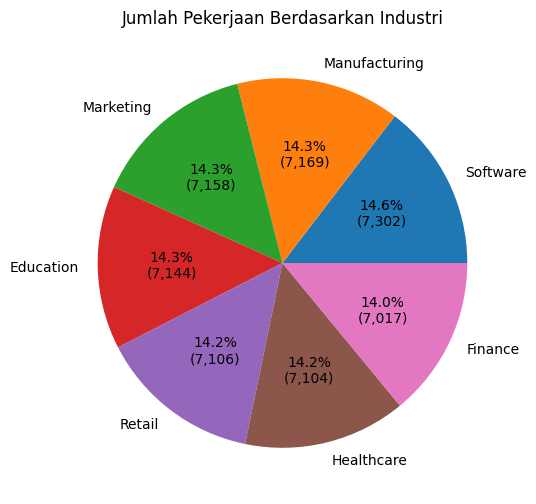

In [7]:
industry_software = df.loc[df['Industry'] == 'Software'].count()[1]
industry_manufacturing = df.loc[df['Industry'] == 'Manufacturing'].count()[1]
industry_marketing = df.loc[df['Industry'] == 'Marketing'].count()[1]
industry_education = df.loc[df['Industry'] == 'Education'].count()[1]
industry_retail = df.loc[df['Industry'] == 'Retail'].count()[1]
industry_healthcare = df.loc[df['Industry'] == 'Healthcare'].count()[1]
industry_finance = df.loc[df['Industry'] == 'Finance'].count()[1]

labels = [
    'Software',
    'Manufacturing',
    'Marketing',
    'Education',
    'Retail',
    'Healthcare',
    'Finance'
]
values = [
    industry_software,
    industry_manufacturing,
    industry_marketing,
    industry_education,
    industry_retail,
    industry_healthcare,
    industry_finance
]

plt.figure(figsize=(12, 6))
plt.title('Jumlah Pekerjaan Berdasarkan Industri')
def func(pct, all_values):
    absolute = int(round(pct/100. * sum(all_values)))
    return f"{pct:.1f}%\n({absolute:,})"

plt.pie(values, labels=labels, autopct=lambda pct: func(pct, values))
plt.show()

Jumlah pekerjaan yang tersedia cukup merata, pekerjaan di industri Sofware merupakan industri yang paling banyak membuka lowongan pekerjaan sebanyak 7302.

        Industry        Salary
0      Education  95190.789474
1        Finance  94943.565626
2     Healthcare  95455.377252
3  Manufacturing  94409.401590
4      Marketing  95203.548477
5         Retail  95197.438784
6       Software  95606.272254


<ipython-input-8-fe86dd203b85>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Industry', y='Salary', data=industry_salary_avg, palette='viridis')


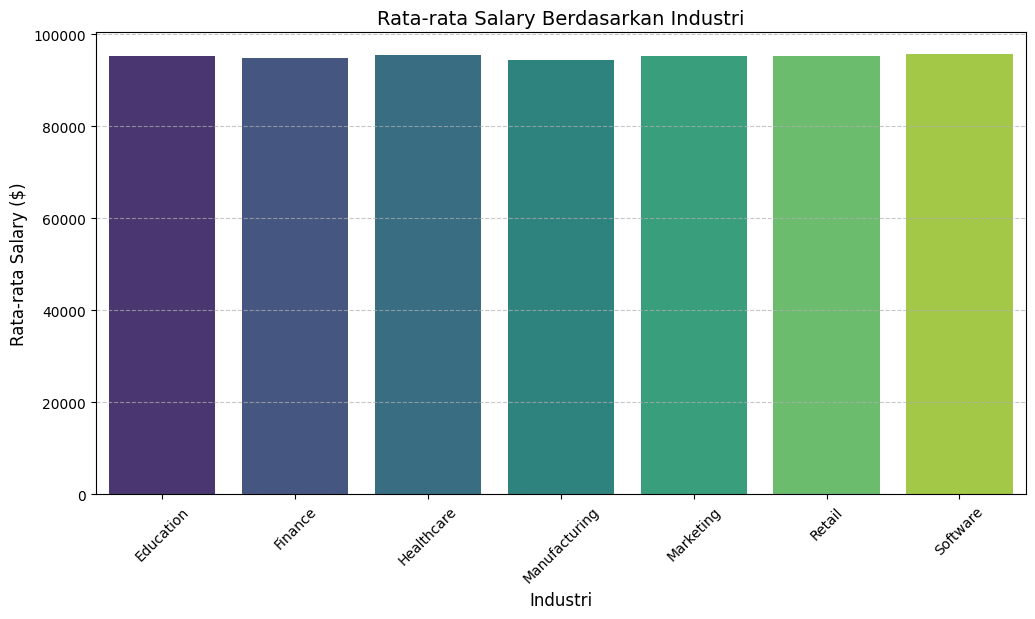

In [8]:
industry_salary_avg = df.groupby('Industry')['Salary'].mean().reset_index()

print(industry_salary_avg)

plt.figure(figsize=(12, 6))
sns.barplot(x='Industry', y='Salary', data=industry_salary_avg, palette='viridis')

plt.title('Rata-rata Salary Berdasarkan Industri', fontsize=14)
plt.xlabel('Industri', fontsize=12)
plt.ylabel('Rata-rata Salary ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Berdasarkan barplot diatas, rata-rata gaji setiap industri hampir sama yaitu kurang lebih 95k USD. Perusahaan yang memberikan gaji tertinggi adalah perusahaan di industri Sofware dengan rata-rata 95606.272254 USD.

## Data Preparation

Data preparation bertujuan untuk mempersiapkan data agar proses pengembangan model diharapkan akurasi model akan menjadi lebih baik dan mengurangi bias pada data. Tahapan preparation data yaitu

- Seleksi Fitur
- Cleaning Data
- Mengubah Nama Kolom dengan Menghapus Spasi
- Mengurangi Dataset
- Ekstraksi Fitur dengan TF-IDF

In [9]:
df.head(3)

,Job Title,Company,Location,Experience Level,Salary,Industry,Required Skills
0,Early years teacher,Richardson Ltd,Sydney,Senior Level,87000.0,Healthcare,Pharmaceuticals
1,Counselling psychologist,"Ramos, Santiago and Stewart",San Francisco,Mid Level,50000.0,Marketing,"Google Ads, SEO, Content Writing"
2,Radio broadcast assistant,Franco Group,New York,Mid Level,77000.0,Healthcare,"Patient Care, Nursing, Medical Research, Pharm..."


Dataset ini memiliki banyak fitur yang dapat digunakan tetapi dalam proyek sistem rekomendasi sederhana ini hanya menggunakan dua kolom yaitu Job Title dan Required Skills. Fitur yang lainnya mungkin dapat menjadi nilai tambah untuk membuat model yang lebih kompleks.

In [10]:
selected_features = ['Job Title', 'Required Skills']
df = df[selected_features]

In [12]:
df.isna().sum()

,0
JobTitle,0
RequiredSkills,0


Data ini sudah bersih jadi tidak perlu cleaning data

Hapus spasi pada kolom Required Skills dan JobTitle

In [11]:
df = df.rename(columns={'Required Skills': 'RequiredSkills', 'Job Title': 'JobTitle'})

Proyek ini hanya membutuhkan 5000 baris data karena keterbatasan resource.

In [13]:
df = df.iloc[:5000]

## Model Development

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(df['RequiredSkills'])
tfidf.get_feature_names_out()

array(['ads', 'analysis', 'aws', 'care', 'chain', 'content', 'control',
       'curriculum', 'customer', 'design', 'edtech', 'excel', 'financial',
       'google', 'java', 'learning', 'machine', 'market', 'media',
       'medical', 'merchandising', 'modeling', 'nursing', 'patient',
       'pharmaceuticals', 'planning', 'production', 'python', 'quality',
       'react', 'research', 'risk', 'sales', 'seo', 'service', 'social',
       'sql', 'supply', 'teaching', 'writing'], dtype=object)

In [15]:
tfidf_matrix = tfidf.transform(df['RequiredSkills'])
tfidf_matrix.shape

(5000, 40)

In [16]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfidf.get_feature_names_out(),
    index=df.RequiredSkills
).sample(10, axis=1).sample(10, axis=0)

,edtech,machine,python,patient,care,nursing,risk,medical,sales,react
RequiredSkills,,,,,,,,,,
"Production Planning, Quality Control",0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0
"Supply Chain, Production Planning, Quality Control",0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0
Risk Analysis,0.000000,0.0,0.0,0.0,0.0,0.0,0.707107,0.00000,0.000000,0.0
"EdTech, Teaching",0.711206,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0
"SEO, Market Research",0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0
Nursing,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,0.00000,0.000000,0.0
"Customer Service, Sales",0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.582215,0.0
"SEO, Content Writing, Google Ads",0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0
"Social Media, Google Ads, Content Writing",0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0


In [17]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(tfidf_matrix)
similarity

array([[1.        , 0.        , 0.42096638, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.42096638, 0.        , 1.        , ..., 0.        , 0.73919259,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.73919259, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [19]:
similarity_df = pd.DataFrame(
    similarity, index=df['JobTitle'], columns=df['JobTitle']
)
similarity_df.sample(10, axis=1).sample(10, axis=0)

JobTitle,Newspaper journalist,Firefighter,Cytogeneticist,Investment analyst,"Surveyor, minerals",Office manager,Research scientist (life sciences),Bonds trader,"Administrator, local government","Optician, dispensing"
JobTitle,,,,,,,,,,
"Pilot, airline",0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Publishing copy,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.444576,0.000000
Solicitor,0.000000,0.0,0.802869,0.000000,0.117819,0.0,0.000000,0.000000,0.000000,0.000000
Dispensing optician,0.695213,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.523537
Ambulance person,0.547879,0.0,0.000000,0.290858,0.000000,0.0,0.000000,0.000000,0.000000,0.664325
Health visitor,0.000000,0.0,0.283273,0.000000,0.333930,0.0,0.000000,0.000000,0.000000,0.000000
Research scientist (physical sciences),0.547136,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.616947,0.412026
"Nurse, mental health",0.000000,0.0,0.085597,0.000000,0.100904,0.0,0.000000,0.000000,0.000000,0.000000
"Lecturer, further education",0.000000,0.0,0.094593,0.000000,1.000000,0.0,0.469919,0.469919,0.000000,0.000000


## Evaluation

In [31]:
def job_recommendations(job_title, similarity_data=similarity_df, items=df[['JobTitle','RequiredSkills']], n=5):

  if not isinstance(similarity_data, pd.DataFrame):
    raise TypeError("similarity_data harus berupa DataFrame pandas.")
  if job_title not in similarity_data.columns:
    raise ValueError(f"Job '{job_title}' tidak ditemukan di data kemiripan.")

  index = similarity_data.loc[:, job_title].to_numpy().argpartition(range(-1, -n-1, -1)).flatten()
  closest = similarity_data.columns[index[-1:-(n+2):-1]]
  closest = closest.drop(job_title, errors='ignore')
  recommendations = pd.DataFrame(closest, columns=['JobTitle']).merge(items, on='JobTitle', how='left')

  return recommendations.head(n)

In [36]:
df[df.JobTitle.eq('Software engineer')]

,JobTitle,RequiredSkills
596,Software engineer,"Social Media, SEO, Google Ads, Content Writing"
1085,Software engineer,"Sales, Merchandising, Customer Service"
1267,Software engineer,Risk Analysis
1333,Software engineer,"Research, Teaching, Curriculum Design"
3789,Software engineer,"Curriculum Design, EdTech, Teaching"
4232,Software engineer,"Content Writing, Google Ads"


In [37]:
job_recommendations('Software engineer')

,JobTitle,RequiredSkills
0,Early years teacher,Pharmaceuticals
1,Early years teacher,"Financial Modeling, Risk Analysis"
2,Early years teacher,"Medical Research, Nursing, Patient Care, Pharm..."
3,Early years teacher,"Java, AWS"
4,Early years teacher,Sales


Sistem telah berhasil merekomendasikan top 5 job yang mirip dengan Software Engineer, yaitu job yang memiliki required skill yang sama.

Evaluasi model Content-Based Filtering dilakukan dengan menggunakan metrik Precision. Metrik ini mengukur sejauh mana model dapat memprediksi kejadian yang relevan atau positif.

Rumus Precision:

![precision_formula](https://github.com/user-attachments/assets/0943cb5f-fcf1-450c-aa48-e694e4b2ecda)

Pada contoh rekomendasi di atas: Precision = 5/5. Jadi precision = 100%.
